<a href="https://colab.research.google.com/github/elifsare/Mean-Reversion-Strategy/blob/main/MeanReversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 79.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

In [ ]:
def get_historical_Data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 10, 27), end=datetime(2023, 3, 9)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ['CPER', 'TLT', 'TTT', 'UUP', 'VXX']
d = get_historical_Data(ticks)
print(d.shape)
d.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(594, 5)


,CPER,TLT,TTT,UUP,VXX
Date,,,,,
2023-03-02,24.809999,99.480003,75.680000,28.420000,44.880001
2023-03-03,24.850000,101.889999,70.260002,28.309999,43.599998
2023-03-06,24.870001,101.099998,71.730003,28.270000,42.840000
2023-03-07,24.230000,101.720001,70.620003,28.620001,43.770000
2023-03-08,24.540001,101.820000,70.250000,28.610001,43.049999


In [ ]:
# korelasyon matrisi hesaplama
corr_matrix = d.corr()
corr_matrix

,CPER,TLT,TTT,UUP,VXX
CPER,1.000000,0.299002,-0.398261,-0.463216,-0.289547
TLT,0.299002,1.000000,-0.969686,-0.909962,0.609876
TTT,-0.398261,-0.969686,1.000000,0.886151,-0.498658
UUP,-0.463216,-0.909962,0.886151,1.000000,-0.603102
VXX,-0.289547,0.609876,-0.498658,-0.603102,1.000000


<Axes: >

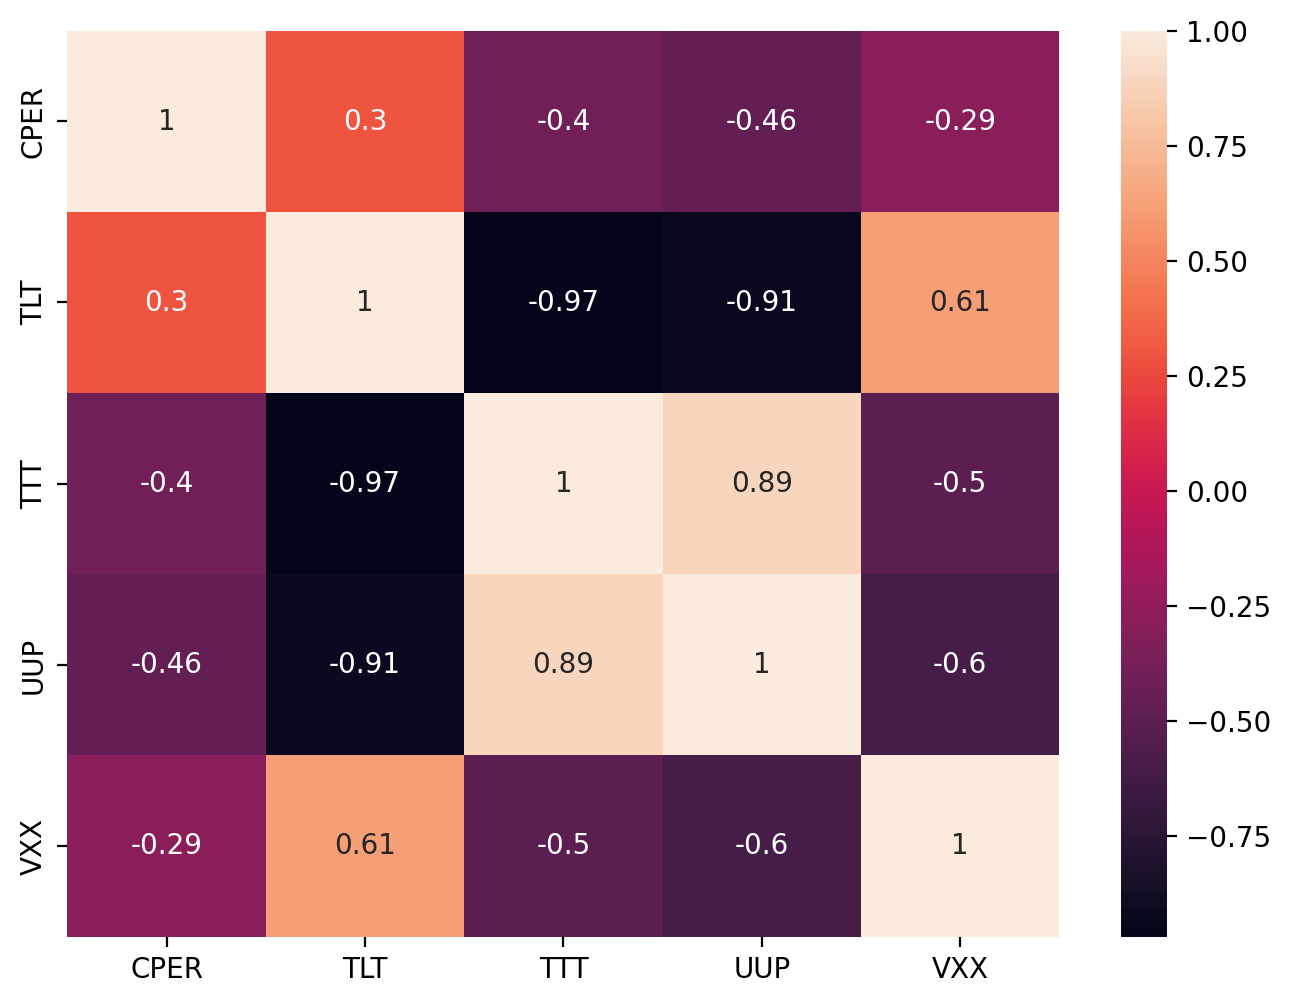

In [ ]:
# Ticker lar arasındaki ilişkiyi anlamak için ısı haritası
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

In [ ]:
# TLT ve UUP arasında ilişki en yüksek değerde(0.89). Bu ikisini grafikte gözlemleyelim:

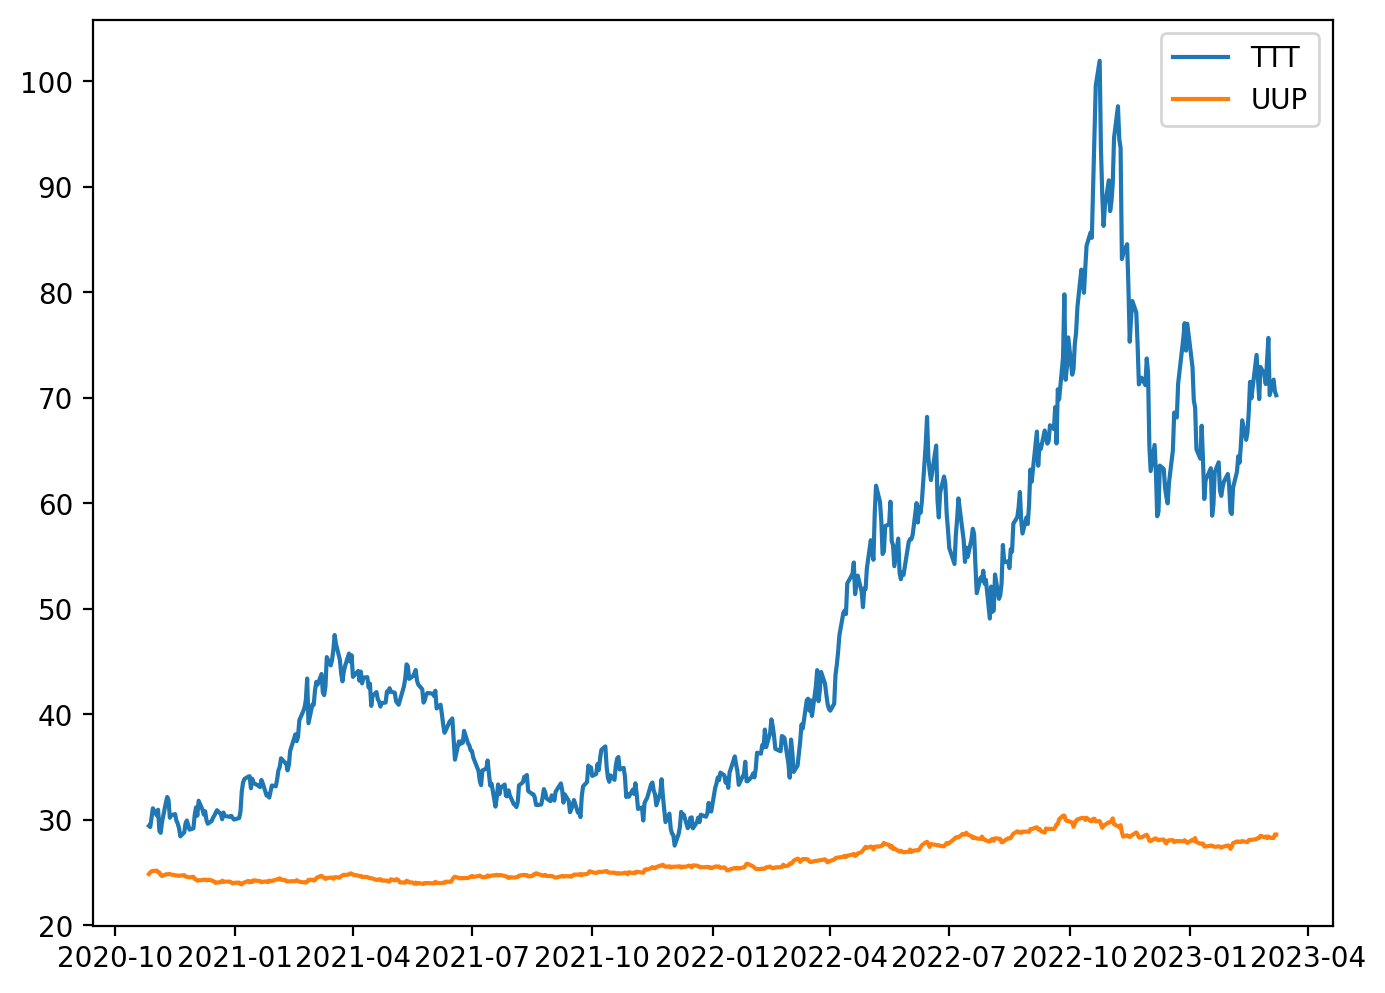

In [ ]:
import matplotlib.pyplot as plt

figure(figsize=(8, 6), dpi=200)

TTT = d['TTT']
UUP = d['UUP']

plt.plot(TTT, label = "TTT")
plt.plot(UUP, label = "UUP")
plt.legend()

In [ ]:
# TLT ve VXX arasındaki ilişkiye de bakalım çünkü onun da değeri(0.61). Bu ikisini grafikte gözlemleyelim:

In [ ]:
# TLT ve VXX in kesişimi olduğu için bu ikisini kullanarak devam ediyoruz

Text(0.5, 1.0, 'Spread between TTT and UUP')

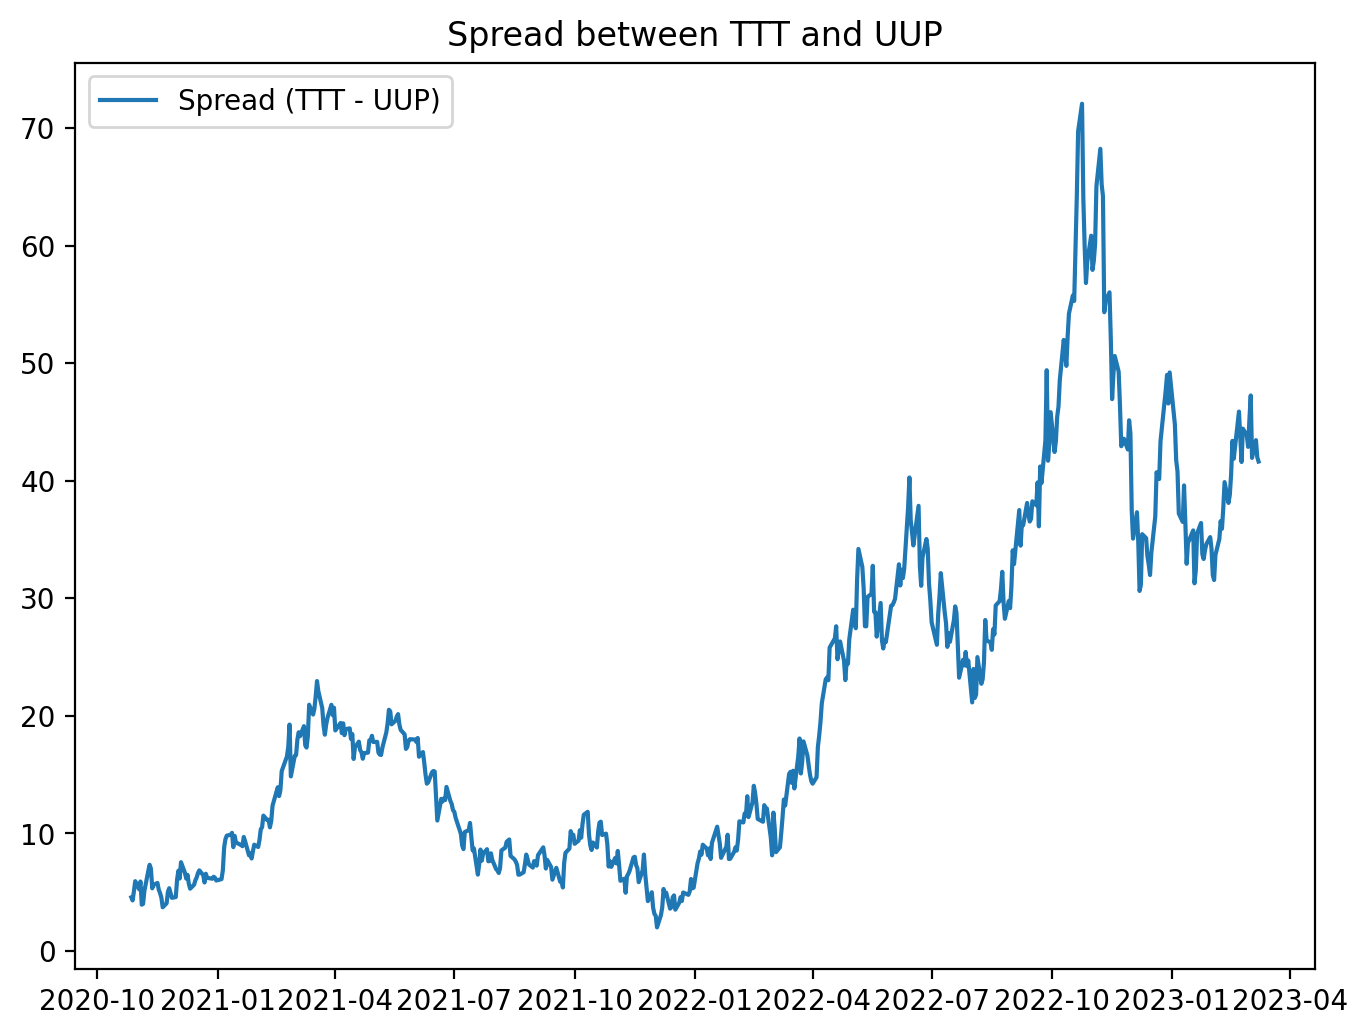

In [ ]:
# TLT ve VXX arasında yayılımı çizdiriyoruz
figure(figsize=(8, 6), dpi=200)
plt.plot(TTT - UUP, label = 'Spread (TTT - UUP)')
plt.legend()
plt.title("Spread between TTT and UUP")

In [ ]:
# Eş bütünleşme değerini(Cointegration Value) kontrol edin: Null hyp. = eş bütünleşme yok
import statsmodels.tsa.stattools as ts 
result = ts.coint(TTT, UUP)

In [ ]:
# Cointegration Test: Bir zaman serisinde (uzun vadeli) potansiyel bir korelasyon bulmak için kullanılan bir teknik. İki varlık arasındaki yayılmanın zaman içinde sabit olup olmadığını belirler.
# Null Hypothesis: Seriler arasındaki yayılma durağan değildir.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
# P val < 0.05 istiyoruz (eşbütünleşmenin var olduğu anlamına gelir)
print('P value', p_val)

P value 0.14235008557502848


In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF TESTİ

# Tüm zaman serilerinde durağan verilere sahip olmak isteriz, aksi takdirde verilerimizi tahmin etmek çok zor olacaktır.

TTT_ADF = adfuller(TTT)
print('P value for the Augmented Dickey-Fuller Test is', TTT_ADF[1])

UUP_ADF = adfuller(UUP)
print('P value for the Augmented Dickey-Fuller Test is', TTT_ADF[1])

Spread_ADF = adfuller(TTT - UUP)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])

Ratio_ADF = adfuller(TTT / UUP)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])

#Sonuçlar: Spread_ADF ve VXX_ADF için durağan olduğunu iddia edebilir (çünkü P değeri < 0,05). 

P value for the Augmented Dickey-Fuller Test is 0.6643734126786756
P value for the Augmented Dickey-Fuller Test is 0.6643734126786756
P value for the Augmented Dickey-Fuller Test is 0.7039076027445174
P value for the Augmented Dickey-Fuller Test is 0.655055186005114


Text(0.5, 1.0, 'Price Ratio between TTT and UUP')

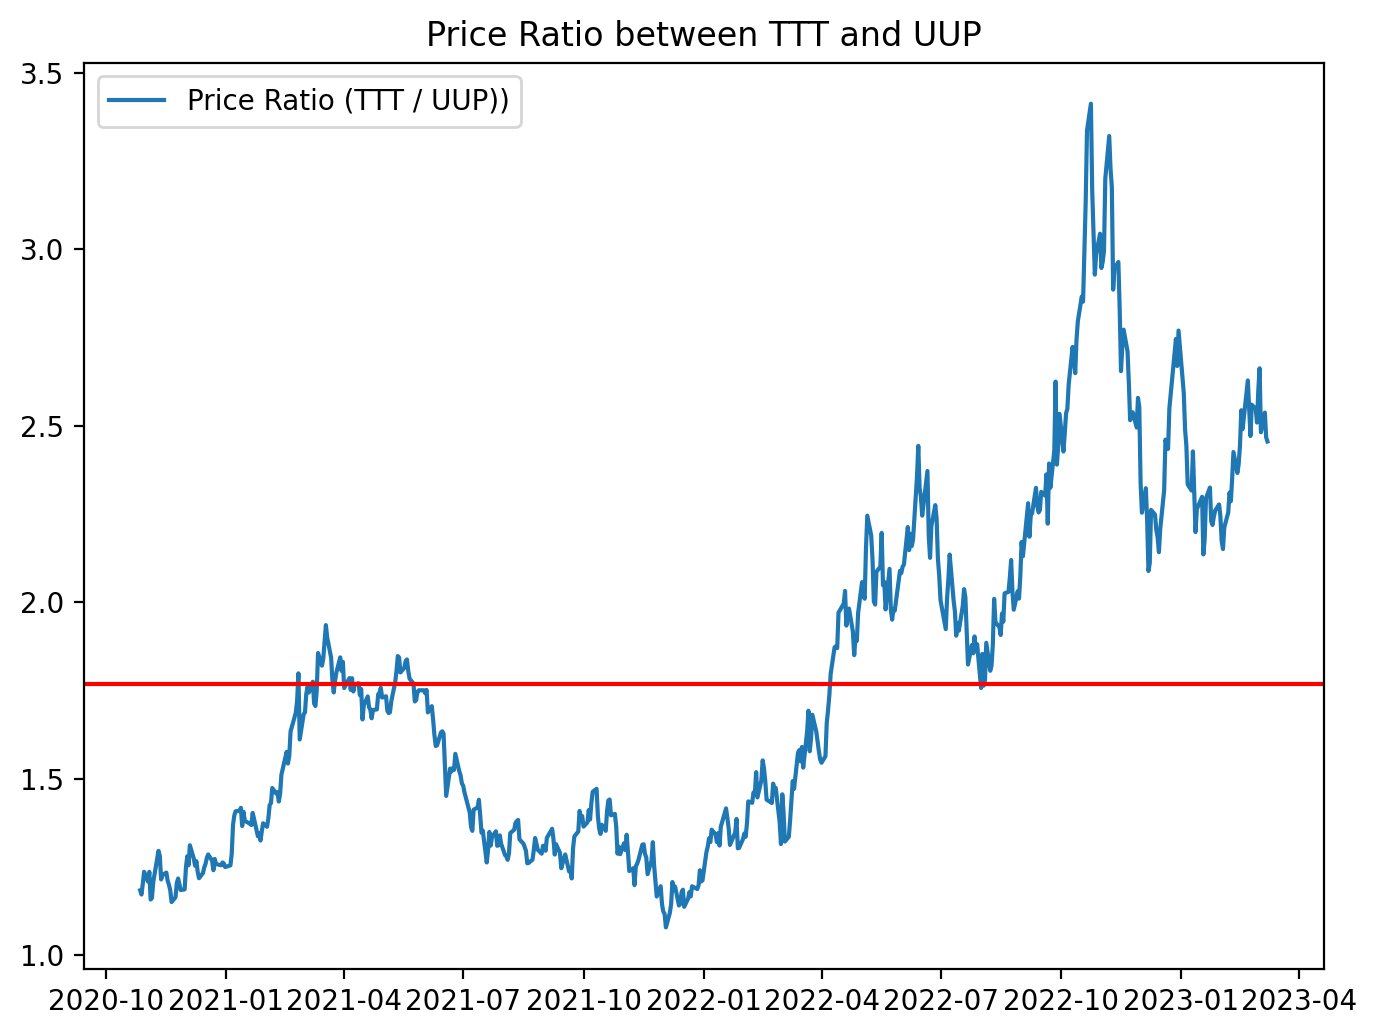

In [ ]:
# İki zaman serisi arasındaki fiyat oranlarına da göz atabiliriz.
figure(figsize=(8, 6), dpi=200)
ratio = TTT / UUP
plt.plot(ratio, label = 'Price Ratio (TTT / UUP))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between TTT and UUP")

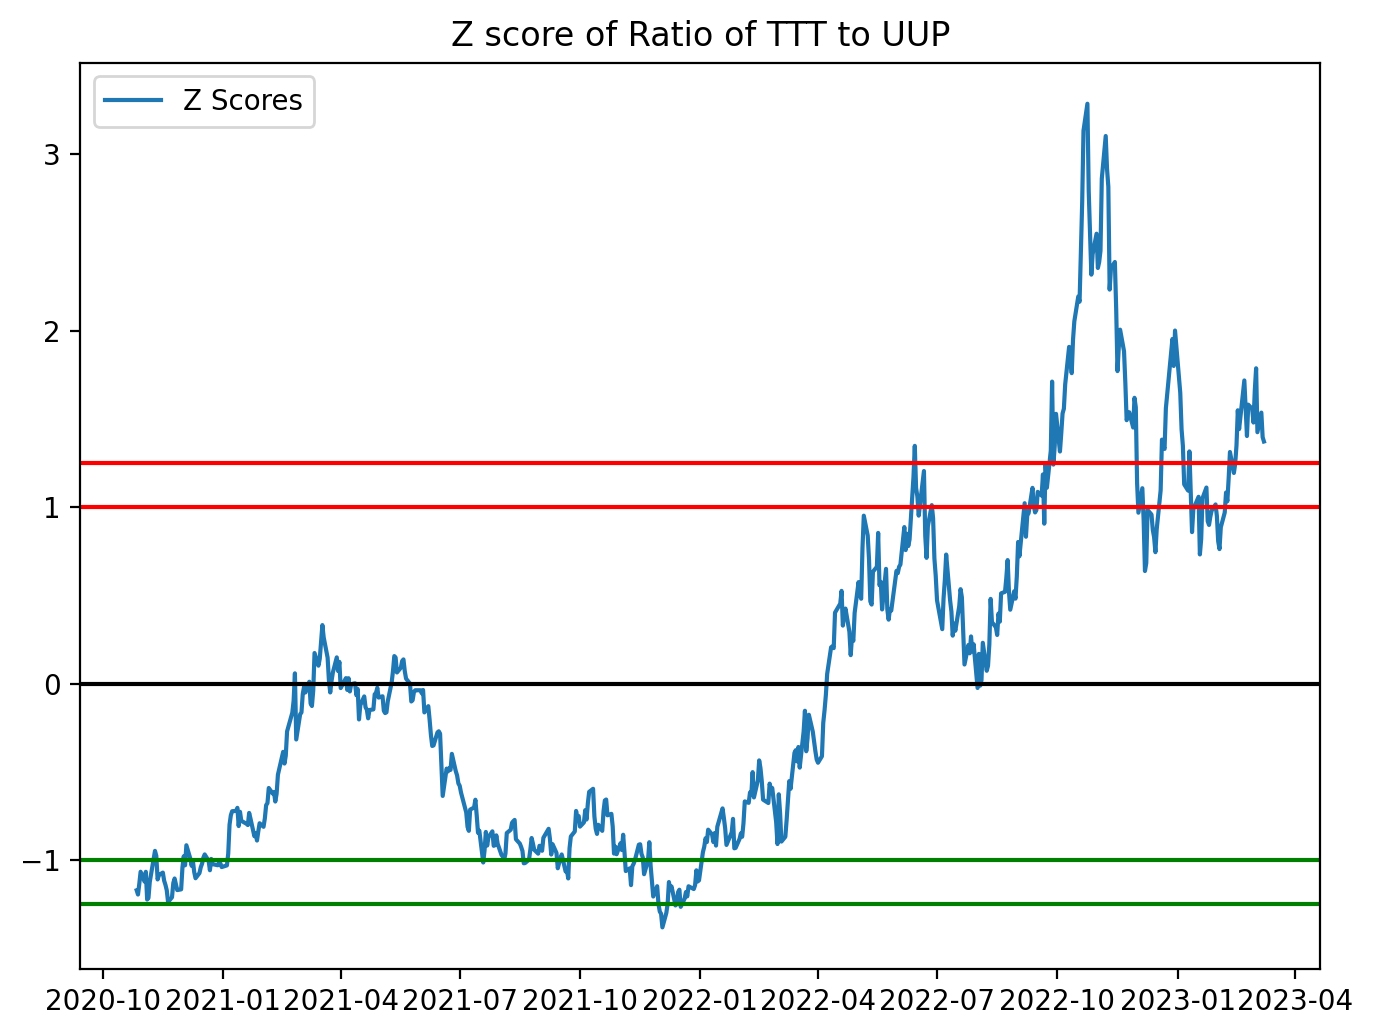

In [ ]:
# Oranı standart hale getirelim ki trendlerimizi değerlendirmemize yardımcı olacak bir üst ve alt sınırımız olsun.. Oran verisine bağlı kalalım.

figure(figsize=(8, 6), dpi=200)

# Her satırın Z scorunu hesaplayın.
df_zscore = (ratio - ratio.mean())/ratio.std()

plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') #  Üst ve alt sınırları 1 ve -1 z puanı olacak şekilde ayarlama (1/-1 standart sapma)
plt.axhline(1.25, color='red') # Verilerimizin %95'i bu sınırlar arasında yer alacaktır.
plt.axhline(-1.0, color='green') # Verilerimizin %68'i bu sınırlar arasında yer alacaktır.
plt.axhline(-1.25, color='green') # Verilerimizin %95'i bu sınırlar arasında yer alacaktır.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of TTT to UUP')

plt.show()

# Çoğunlukla, bu 'bantların' dışında kalan aralık ortalamaya geri dönmelidir. Böylece, çifti ne zaman uzun veya kısa tutabileceğinizi belirleyebilirsiniz (TLT'den VXX'e).

In [ ]:
# Eğitim ve test için 80 / 20'yi bölebilirsiniz, ANCAK sadece modelin üzerinden geçeceğimiz için geriye dönük test yapmayacağız.
# ML ile yapsaydık
# train = ratio[0:round(0.8*len(ratio))]
# test = ratio[round(0.8*len(ratio)):]
# print('Do the splits check out?',len(train) + len(test) == len(ratio))

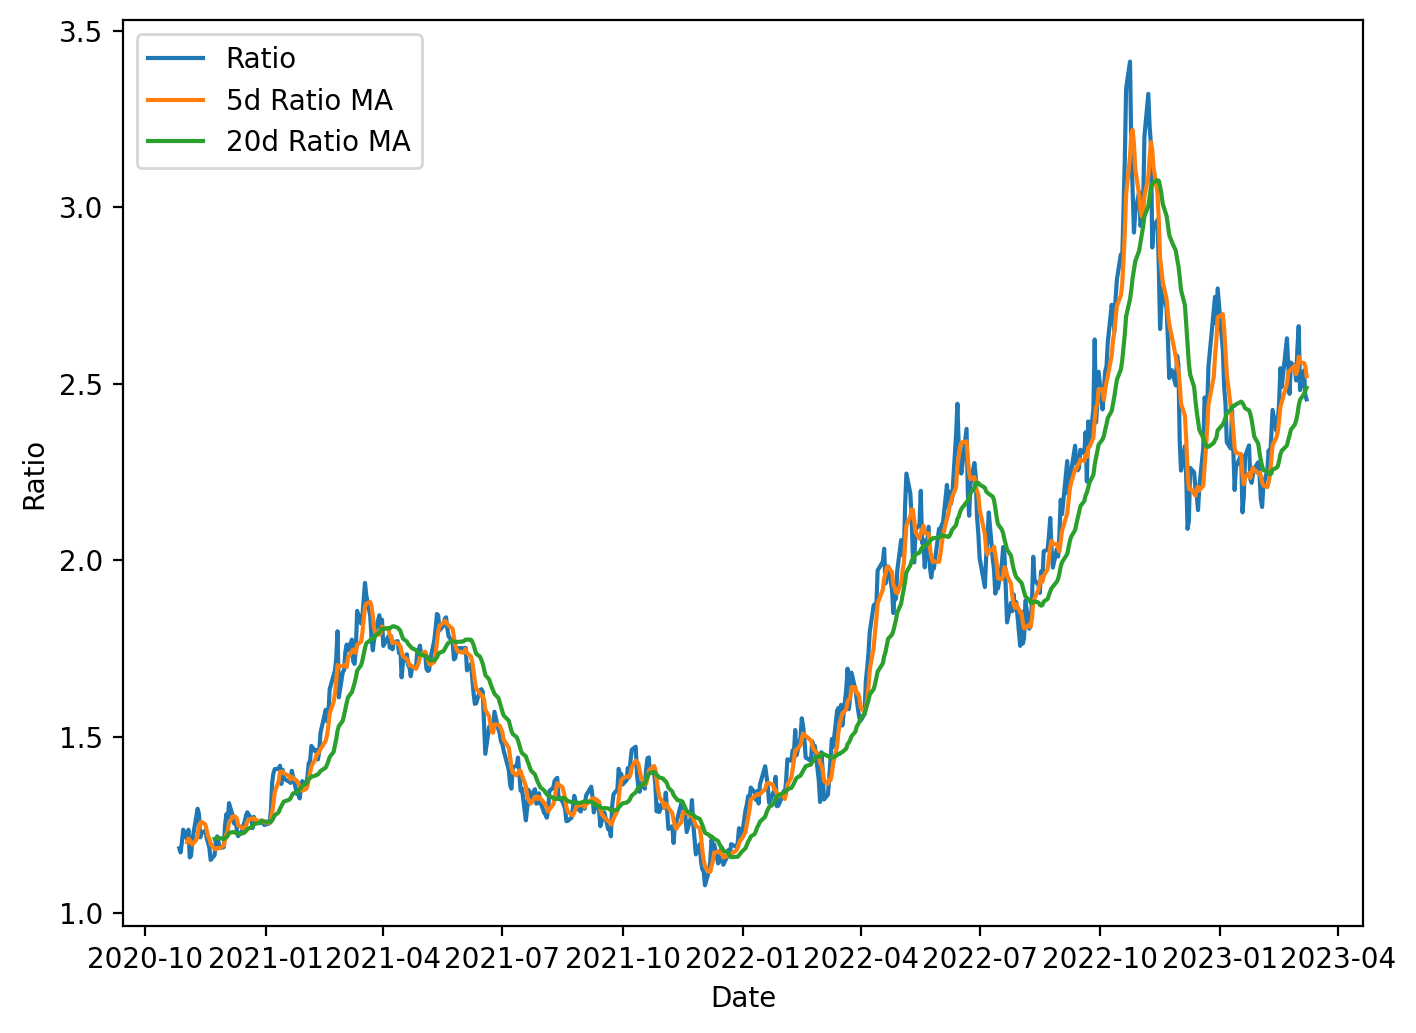

In [ ]:
figure(figsize=(8, 6), dpi=200)

# ML kullanmadan rolling ile yapıyoruz:
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()

std_20 = ratio.rolling(window=20, center=False).std()

zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20

plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

# Yeşil benim tahminim??

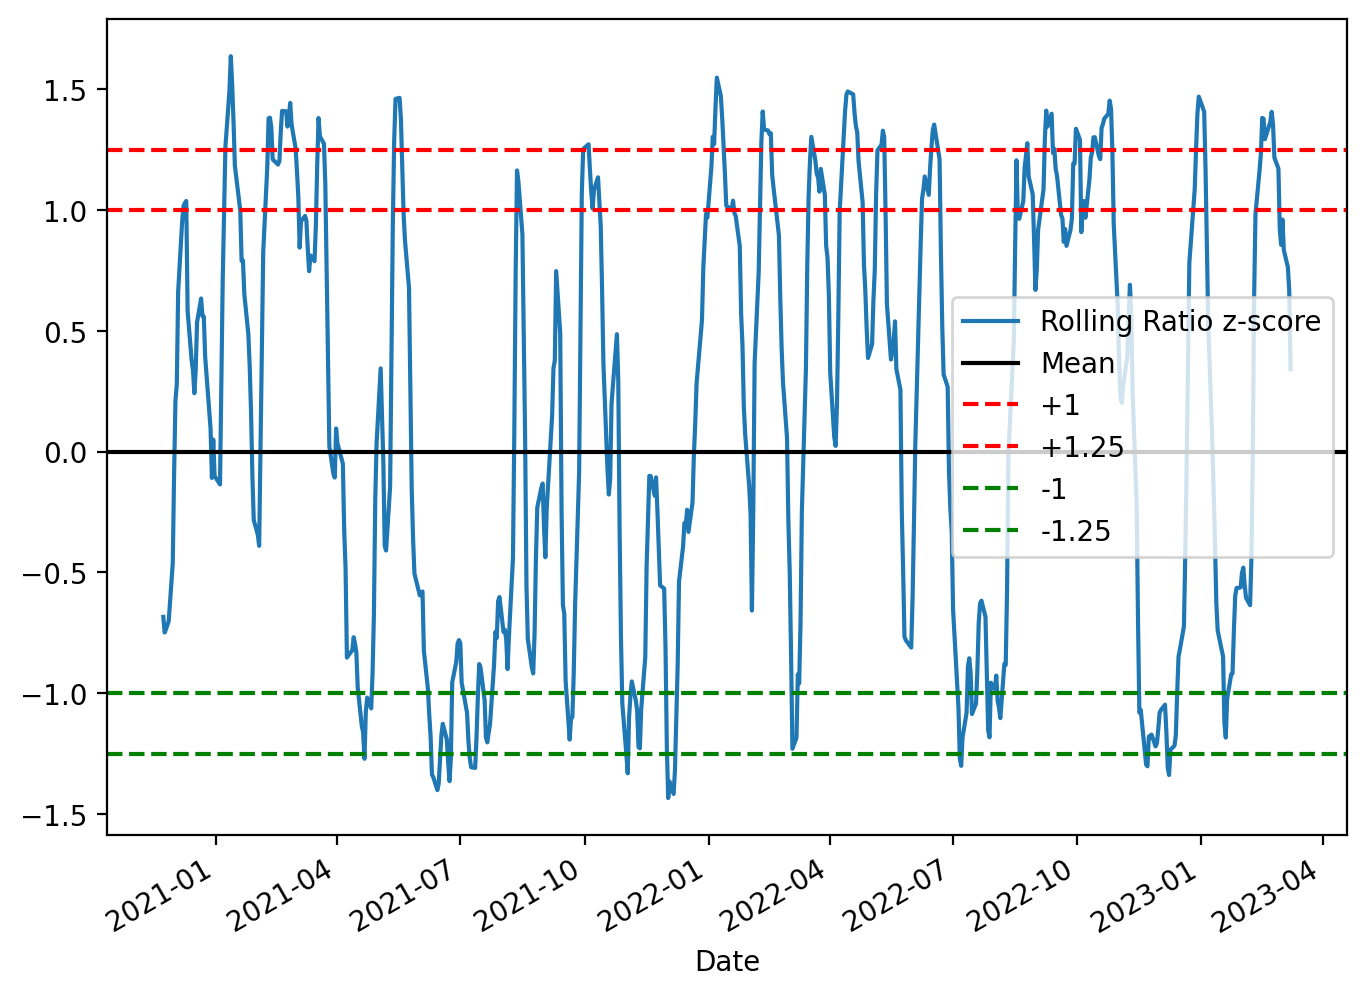

In [ ]:
figure(figsize=(8, 6), dpi=200)

zscore_20_5.plot()

plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])

plt.show()

# Çizgilerin dışında olduğu zamanlarda alım stım için karar???

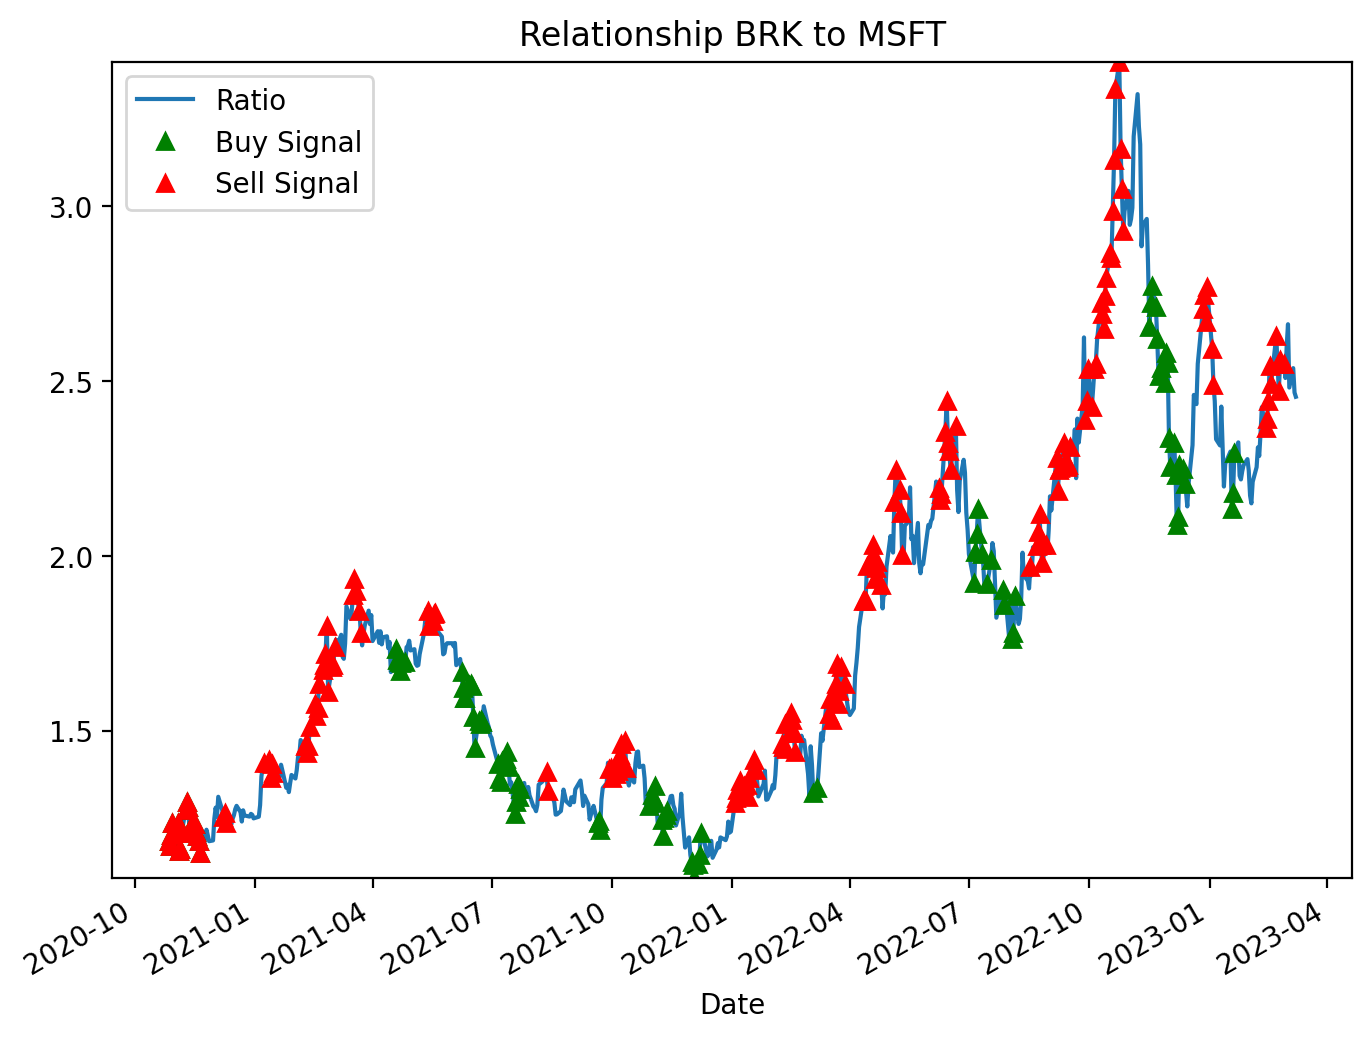

In [ ]:
figure(figsize=(8, 6), dpi=200)

ratio.plot()

buy = ratio.copy()
sell = ratio.copy()

buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0

buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))

plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')

plt.show()